In [1]:
#Which types of vehicles have the highest number of accidents and worst severity?

#Is there a particular day of the week and time with a higher number of accidents? (Monday after 5 vs Friday after 5)

#Does higher amount of horsepower correlate to higher risk of accidents?

#How does age and sex affect risk of accident and severity? (could bin ages to inexperienced, moderately experienced, experienced, senior citizen)

#Do bigger vehicles correlate to higher rate of casualties/severity? (Are motorcycles/mopeds more dangerous?)

#Does purpose of trip affectt risk of accident?

#Do lighting conditions (time of day) have an effect on accidents and severity? (daylight vs darkness)

#Which type of vehicles maneuvers cause the most accidents? (see vehicle maneuver context csv)

#How do different types of intersections effect risk of accident and severity?

#Do older vehicles have any type of effect on accidents?

### top 5 locations for accidents - heatmaps 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from datetime import date
from collections import defaultdict
import seaborn as sns

#main data source
files = glob.glob('source/*.csv')
#['source/Vehicles0515.csv',
# 'source/Accidents0515.csv',
# 'source/Casualties0515.csv']

context_files = glob.glob('source/context/*.csv')
#context_files

#!pwd

In [2]:
# accident Data set
accident_set = pd.read_csv(files[1])
#print(accident_set.columns)

In [3]:
# 1st clean
accident_set = accident_set.dropna(axis=0, how='all')
accident_set.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857


In [6]:
# Vehicle Data set
vehicle_set = pd.read_csv(files[0])

In [7]:
# 1st clean
vehicle_set = vehicle_set.drop_duplicates()
vehicle_set = vehicle_set.dropna(axis=0, how='all')
vehicle_set = vehicle_set.dropna(axis=1, how='any')


In [8]:
# show first 3 rows
vehicle_set.head(3)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1


In [9]:
# Join accident and vehicle on Accident
merge_set = pd.merge(vehicle_set,
                    accident_set,
                    on='Accident_Index', how= 'outer')

In [14]:
# show first 10
merge_set.head(10)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,0,0,4,1,1,0,0,1,1,E01002857
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,0,0,1,1,1,0,0,1,1,E01002840
5,200501BS00005,1,3,0,18,0,0,1,10,0,...,0,0,7,1,2,0,0,1,1,E01002863
6,200501BS00006,1,9,0,5,0,0,0,0,0,...,0,0,1,2,2,6,0,1,1,E01002832
7,200501BS00006,2,3,0,18,0,0,0,0,0,...,0,0,1,2,2,6,0,1,1,E01002832
8,200501BS00007,1,3,0,18,0,1,0,4,0,...,0,0,4,1,1,0,0,1,1,E01002875
9,200501BS00007,2,9,0,2,0,1,0,0,0,...,0,0,4,1,1,0,0,1,1,E01002875


In [10]:
#outer merging keeps common values in both left and right. Only rows with city should be return.  
print(merge_set.shape)
# (3262270, 53)
print(vehicle_set.shape)
# (3262270, 22)
print(accident_set.shape)
#(1780653, 32)
# validate by checking the number of values in commomn 
merge_set.count()
#combined_dat
vehicle_set['Accident_Index'].isin(accident_set['Accident_Index']).value_counts()


(3262270, 53)
(3262270, 22)
(1780653, 32)


True    3262270
Name: Accident_Index, dtype: int64

In [11]:
# assign vehicle types context 
vehicle_type = pd.read_csv(context_files[2])

In [12]:
# index will now be know as the code type that describes each vehicle
vehicle_type = vehicle_type.set_index('code')

In [13]:
# Created another set for our1st Question. Inner join on the type of vehicles
types_of_vehicles = merge_set.join(vehicle_type, on='Vehicle_Type', how='inner')

In [14]:
types_of_vehicles = types_of_vehicles[types_of_vehicles.label != 'Data missing or out of range']

In [15]:
# first couple of rows
types_of_vehicles.head(5)  

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,label
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,1,2,2,0,0,1,1,E01002849,Car
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,0,4,1,1,0,0,1,1,E01002857,Car
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,0,1,1,1,0,0,1,1,E01002840,Car
6,200501BS00006,1,9,0,5,0,0,0,0,0,...,0,1,2,2,6,0,1,1,E01002832,Car
9,200501BS00007,2,9,0,2,0,1,0,0,0,...,0,4,1,1,0,0,1,1,E01002875,Car


In [25]:
## last rows
types_of_vehicles.tail()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,label
3139961,2015320011119,2,23,0,18,0,0,0,0,0,...,0,1,1,-1,0,0,1,2,E01026109,Electric motorcycle
3143549,2015331500216,2,23,0,9,0,3,0,0,0,...,5,4,6,2,0,0,1,1,E01025719,Electric motorcycle
3182907,201543W048065,1,23,0,18,0,0,0,0,0,...,0,1,1,1,0,0,1,1,E01016403,Electric motorcycle
3193038,2015450022238,1,23,0,18,9,0,5,0,0,...,0,7,1,1,5,0,1,1,E01030430,Electric motorcycle
3237925,201560S036521,1,23,0,5,0,1,0,0,0,...,0,1,1,1,0,0,2,1,W01000404,Electric motorcycle


In [16]:
# Checking - 6 random sample of rows
vehicle_sample = types_of_vehicles.sample(100)

In [18]:
#num or rows/columns in a tuple # memory usage: 1.3+ GB
types_of_vehicles.shape

(3261739, 54)

In [28]:
# calculate measures of central tendency
#types_of_vehicles.describe()   

In [19]:
# data types and memory consumption 
types_of_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3261739 entries, 0 to 3237925
Data columns (total 54 columns):
Accident_Index                                 object
Vehicle_Reference                              int64
Vehicle_Type                                   int64
Towing_and_Articulation                        int64
Vehicle_Manoeuvre                              int64
Vehicle_Location-Restricted_Lane               int64
Junction_Location                              int64
Skidding_and_Overturning                       int64
Hit_Object_in_Carriageway                      int64
Vehicle_Leaving_Carriageway                    int64
Hit_Object_off_Carriageway                     int64
1st_Point_of_Impact                            int64
Was_Vehicle_Left_Hand_Drive?                   int64
Journey_Purpose_of_Driver                      int64
Sex_of_Driver                                  int64
Age_of_Driver                                  int64
Age_Band_of_Driver                    

In [20]:
most_acc= types_of_vehicles.groupby(['label','Vehicle_Type'])['Accident_Severity'].value_counts()

mean_acc= types_of_vehicles.groupby('label')['Accident_Severity'].sum()

In [21]:
most_vehicle_accident = types_of_vehicles.groupby('label')['Accident_Severity'].value_counts()

In [22]:
most_accidents = types_of_vehicles.groupby('Accident_Severity')['label'].value_counts()

In [23]:
types_of_vehicles['label'].value_counts()

Car                                      2388155
Pedal cycle                               203523
Van / Goods 3.5 tonnes mgw or under       152058
Motorcycle over 500cc                      93958
Bus or coach (17 or more pass seats)       82269
Motorcycle 125cc and under                 79386
Goods 7.5 tonnes mgw and over              67724
Taxi/Private hire car                      57829
Motorcycle 50cc and under                  39461
Motorcycle over 125cc and up to 500cc      27873
Other vehicle                              25591
Goods over 3.5t. and under 7.5t            24275
Minibus (8 - 16 passenger seats)            8885
Agricultural vehicle                        6808
Ridden horse                                1404
Goods vehicle - unknown weight              1002
Mobility scooter                             681
Motorcycle - unknown cc                      561
Tram                                         268
Electric motorcycle                           28
Name: label, dtype: 

In [34]:
#number of accident and most severe per vehicle
most_vehicle_accident

label                                  Accident_Severity
Agricultural vehicle                   3                       5162
                                       2                       1367
                                       1                        279
Bus or coach (17 or more pass seats)   3                      71869
                                       2                       9476
                                       1                        924
Car                                    3                    2104317
                                       2                     258153
                                       1                      25685
Electric motorcycle                    3                         19
                                       2                          9
Goods 7.5 tonnes mgw and over          3                      54468
                                       2                      10053
                                       1                   

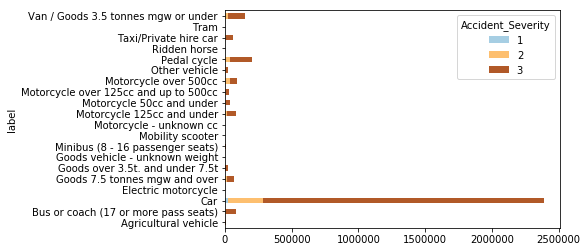

In [36]:
mostaccidents = types_of_vehicles.groupby(
    ['Accident_Severity','label'])['Vehicle_Reference'].count()
#accidents_plt = mostaccidents.unstack('Accident_Severity').loc[:, 3]
accidents_plt = mostaccidents.unstack('Accident_Severity')
accidents_plt.plot(kind='barh', stacked=True,colormap='Paired')

In [37]:
# Most Accidents categorize on severety with 3 as worst 
most_acc = pd.DataFrame(most_accidents)
most_acc

label
Accident_Severity label                                         
1                 Car                                      25685
                  Motorcycle over 500cc                     3940
                  Goods 7.5 tonnes mgw and over             3203
                  Van / Goods 3.5 tonnes mgw or under       2259
                  Pedal cycle                               1424
                  Bus or coach (17 or more pass seats)       924
                  Motorcycle 125cc and under                 704
                  Goods over 3.5t. and under 7.5t            599
                  Motorcycle over 125cc and up to 500cc      550
                  Taxi/Private hire car                      505
                  Other vehicle                              490
                  Agricultural vehicle                       279
                  Minibus (8 - 16 passenger seats)           171
                  Motorcycle 50cc and under                  162
                  Ridden horse                                25
                  Mobility scooter                            23
                  Goods vehicle - unknown weight              16
                  Tram                                         9
                  Motorcycle - unknown cc                      7
2                 Car                                     258153
                  Pedal cycle                              32670
                  Motorcycle over 500cc                    30720
                  Van / Goods 3.5 tonnes mgw or under      18319
                  Motorcycle 125cc and under               16904
                  Goods 7.5 tonnes mgw and over            10053
                  Bus or coach (17 or more pass seats)      9476
                  Motorcycle over 125cc and up to 500cc     7446
                  Motorcycle 50cc and under                 6816
                  Taxi/Private hire car                     6766
                  Other vehicle                             3659
                  Goods over 3.5t. and under 7.5t           3133
                  Agricultural vehicle                      1367
                  Minibus (8 - 16 passenger seats)          1183
                  Ridden horse                               293
                  Motorcycle - unknown cc                    161
                  Mobility scooter                           142
                  Goods vehicle - unknown weight             126
                  Tram                                        48
                  Electric motorcycle                          9
3                 Car                                    2104317
                  Pedal cycle                             169429
                  Van / Goods 3.5 tonnes mgw or under     131480
                  Bus or coach (17 or more pass seats)     71869
                  Motorcycle 125cc and under               61778
                  Motorcycle over 500cc                    59298
                  Goods 7.5 tonnes mgw and over            54468
                  Taxi/Private hire car                    50558
                  Motorcycle 50cc and under                32483
                  Other vehicle                            21442
                  Goods over 3.5t. and under 7.5t          20543
                  Motorcycle over 125cc and up to 500cc    19877
                  Minibus (8 - 16 passenger seats)          7531
                  Agricultural vehicle                      5162
                  Ridden horse                              1086
                  Goods vehicle - unknown weight             860
                  Mobility scooter                           516
                  Motorcycle - unknown cc                    393
                  Tram                                       211
                  Electric motorcycle                         19

In [38]:
casualties = pd.read_csv(files[2])

In [39]:
casualties.head(3)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,extra
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1,NaN
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1,NaN
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1,NaN


In [40]:
print(type(types_of_vehicles.Day_of_Week))

<class 'pandas.core.series.Series'>


In [41]:
# day of week file to join
days_of_week = pd.read_csv(context_files[15])

In [42]:
days_of_week = days_of_week.set_index('code')

In [43]:
type(days_of_week)

pandas.core.frame.DataFrame

In [44]:
days_of_week = days_of_week.rename(columns={'label': 'Days'})

In [45]:
part_of_days = types_of_vehicles.join(
    days_of_week, on='Day_of_Week', how='inner')

In [47]:
part_of_days.head(4)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,label,Days
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,2,2,0,0,1,1,E01002849,Car,Tuesday
6,200501BS00006,1,9,0,5,0,0,0,0,0,...,1,2,2,6,0,1,1,E01002832,Car,Tuesday
16,200501BS00014,1,9,0,9,0,8,0,0,0,...,4,1,2,0,0,1,1,E01002912,Car,Tuesday
18,200501BS00015,1,9,0,9,0,3,0,0,0,...,1,2,2,0,0,1,1,E01002849,Car,Tuesday


In [49]:
# Created another set for our1st Question. Inner join on the type of vehicles
#set = part_of_days.join(casualties, on='Vehicle_Reference', how='inner')

In [53]:
#Data set main for now
part_days = part_of_days.loc[:,['Days','label','Number_of_Vehicles' ,'Accident_Severity','Number_of_Casualties','Date','Time']]

In [54]:
part_days = part_days.rename(columns={'label':'Vehicle_Type'})

In [55]:
accidents_perday = part_of_days.groupby('Days')['Accident_Severity'].value_counts()
accidents_perday

Days       Accident_Severity
Friday     3                    466707
           2                     65402
           1                      6344
Monday     3                    405460
           2                     55390
           1                      5364
Saturday   3                    359624
           2                     58029
           1                      6733
Sunday     3                    289765
           2                     51668
           1                      6298
Thursday   3                    429238
           2                     59862
           1                      5509
Tuesday    3                    429538
           2                     58566
           1                      5375
Wednesday  3                    432988
           2                     58527
           1                      5352
Name: Accident_Severity, dtype: int64

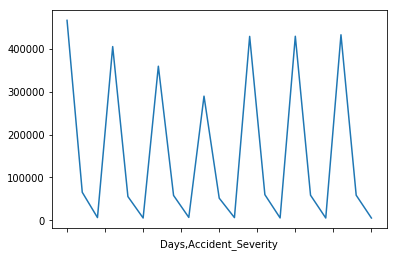

In [56]:
accidents_perday.plot()

In [57]:
#Is there a particular day of the week and time with a higher number of accidents? (Monday after 5 vs Friday after 5)
part_of_days = part_of_days.groupby('Days')['Time'].value_counts()

In [58]:
type(part_of_days)

pandas.core.series.Series

In [62]:
#part_of_days

Days       Time 
Friday     17:00    5493
           15:30    5154
           16:00    5058
           16:30    5019
           17:30    4993
           18:00    4782
           15:00    4391
           08:30    4291
           18:30    3855
           14:00    3794
           13:00    3656
           19:00    3618
           09:00    3464
           17:15    3446
           13:30    3444
           14:30    3443
           12:30    3269
           17:20    3251
           08:00    3149
           12:00    3144
           16:45    3128
           15:45    3120
           17:45    3098
           16:15    3004
           19:30    2988
           08:45    2868
           08:50    2862
           15:15    2856
           17:10    2818
           16:20    2799
                    ... 
Wednesday  03:22       7
           01:39       6
           01:43       6
           02:02       6
           02:46       6
           03:19       6
           03:31       6
           03:48       6
        

In [60]:
type(part_days)

pandas.core.frame.DataFrame

In [61]:
part_days.set_index('Date')

,Days,Vehicle_Type,Number_of_Vehicles,Accident_Severity,Number_of_Casualties,Time
Date,,,,,,
04/01/2005,Tuesday,Car,1,2,1,17:42
11/01/2005,Tuesday,Car,2,3,1,12:40
25/01/2005,Tuesday,Car,2,3,1,20:48
11/01/2005,Tuesday,Car,1,3,1,12:55
18/01/2005,Tuesday,Car,2,3,1,05:01
18/01/2005,Tuesday,Car,2,3,1,05:01
01/02/2005,Tuesday,Car,2,3,1,18:20
01/02/2005,Tuesday,Car,4,3,1,13:02
01/02/2005,Tuesday,Car,4,3,1,13:02


In [64]:
#dayOf = part_days.groupby(['Date','Days','Time'])['Accident_Severity'].sum()
dayOf = part_days.groupby(['Date','Days'])['Accident_Severity'].value_counts()

dayOf

Date        Days       Accident_Severity
01/01/2005  Saturday   3                    401
                       2                     71
                       1                     10
01/01/2006  Sunday     3                    365
                       2                     67
                       1                     10
01/01/2007  Monday     3                    463
                       2                     76
                       1                     12
01/01/2008  Tuesday    3                    318
                       2                     62
                       1                     10
01/01/2009  Thursday   3                    311
                       2                     56
                       1                      9
01/01/2010  Friday     3                    383
                       2                     59
                       1                      4
01/01/2011  Saturday   3                    247
                       2                     52

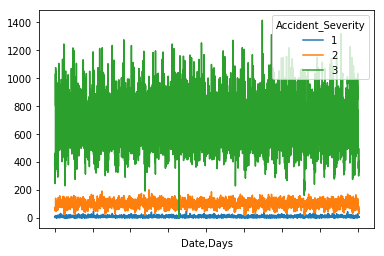

In [71]:
dayOf_plt = dayOf.unstack('Accident_Severity')
d =dayOf.unstack('Days')

d.head(3)
dayOf_plt.plot()

In [75]:
#Does higher amount of horsepower correlate to higher risk of accidents?

risk_of_accidents = types_of_vehicles

In [74]:
risk_of_accidents.head(2)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,label
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,1,2,2,0,0,1,1,E01002849,Car
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,0,4,1,1,0,0,1,1,E01002857,Car


In [79]:
# Drop all rows on where the vehicle type does not refrences a value that is equivalent a moving vehicle 
risk_of_accidents = risk_of_accidents[risk_of_accidents.Vehicle_Type != -1]

AttributeError: 'DataFrame' object has no attribute 'Vehicle_Type'

In [80]:
risk_of_accidents = risk_of_accidents.loc[:,['label','Engine_Capacity_(CC)','Accident_Severity']]

In [81]:
risk_of_accidents 

,label,Engine_Capacity_(CC),Accident_Severity
0,Car,-1,2
3,Car,1762,3
4,Car,1769,3
6,Car,2976,3
9,Car,4266,3
10,Car,5343,3
11,Car,1998,3
12,Car,-1,3
15,Car,1988,3
16,Car,1124,3


In [85]:
risk_of_accidents = risk_of_accidents.rename(columns={'label':'Vehicle_Type', 'Engine_Capacity_(CC)':'Engine_Capacity'})

In [86]:
risk_of_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3261739 entries, 0 to 3237925
Data columns (total 3 columns):
Vehicle_Type         object
Engine_Capacity      int64
Accident_Severity    int64
dtypes: int64(2), object(1)
memory usage: 99.5+ MB


In [87]:
risk_of_accidents = risk_of_accidents[risk_of_accidents.Engine_Capacity != -1]

In [88]:
risk_of_accidents = risk_of_accidents.set_index('Vehicle_Type')

In [89]:
risk_of_accidents['Accident_Severity'].value_counts()


3    2074335
2     294739
1      32435
Name: Accident_Severity, dtype: int64

In [ ]:
#risk_of_accidents = risk_of_accidents.set_index('Vehicle_Type')

In [90]:
high_risk_of_accidents = risk_of_accidents[risk_of_accidents['Accident_Severity']==3]


In [ ]:
# Drop all rows that the index is not equal to a moving vehicle 
#risk_of_accidents = risk_of_accidents.drop(
#    ['Pedal cycle','Ridden horse',
#     'Mobility scooter','Data missing or out of range'], axis=0)


In [ ]:
high_risk_of_accidents.head(3)

In [ ]:
risk_of_accidents['Accident_Severity'
                      ].corr(risk_of_accidents
                             ['Engine_Capacity'])

In [94]:
risk_of_accidents.plot(kind='bar')

In [98]:
risk_of_accidents

,Engine_Capacity,Accident_Severity
Vehicle_Type,,
Car,1762,3
Car,1769,3
Car,2976,3
Car,4266,3
Car,5343,3
Car,1998,3
Car,1988,3
Car,1124,3
Car,1360,3


In [ ]:
#risk_of_accidents['Accident_Severity'].corr(risk_of_accidents['Engine_Capacity'])

In [ ]:
#risk_of_accidents.count()

In [248]:
#How does age and sex affect risk of accident and severity? (could bin ages to inexperienced, moderately experienced, experienced, senior citizen)

#Do bigger vehicles correlate to higher rate of casualties/severity? (Are motorcycles/mopeds more dangerous?)

#Does purpose of trip affectt risk of accident?



